## LabelEncoding

In [ ]:
import pandas as pd

df = pd.DataFrame({'size':['XXL', 'XL', 'L', 'M', 'S']})


# Using Pandas

cat = pd.Categorical(df['size'], categories=df['size'].unique(), ordered=True)

df['size_code'] = cat.codes

# Using sklearn

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(df['tw'])

le.transform(df['size'])

## One Hot Encoding (Dummies)

In [4]:
import pandas as pd

# Using Pandas

df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c']})

pd.get_dummies(df)



# Using sklearn
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()

enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

enc.transform([[0, 1, 3]]).toarray()

array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [7]:
df
pd.get_dummies(df)

,A_a,A_b,B_a,B_b,B_c
0,1,0,0,1,0
1,0,1,1,0,0
2,1,0,0,0,1


In [8]:
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [9]:
enc.transform([[0, 1, 3]]).toarray()

array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

0.001674055614633405 1.0051430221000262 -0.022262740036075174 3.0881885215243017
-0.02293007688709934 1.9963668266428847 -0.003480600064472565 3.0303240021702025
0.5094885423567614 0.6990353790558158 0.8304161038046113 3.467943364476144
2.0005950907315393 1.1534493207832146 0.005973492916140229 1.816069487794795


C:\Users\TanziAI\.conda\envs\newtensorflow\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\TanziAI\.conda\envs\newtensorflow\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\TanziAI\.conda\envs\newtensorflow\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


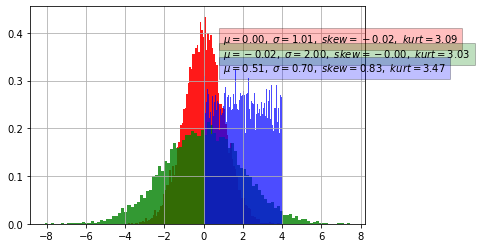

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np
def calc(data):
    n=len(data) # 10000个数
    niu=0.0 # niu表示平均值,即期望.
    niu2=0.0 # niu2表示平方的平均值
    niu3=0.0 # niu3表示三次方的平均值
    for a in data:
        niu += a
        niu2 += a**2
        niu3 += a**3
    niu /= n  
    niu2 /= n
    niu3 /= n
    sigma = math.sqrt(niu2 - niu*niu)
    return [niu,sigma,niu3]

def calc_stat(data):
    [niu, sigma, niu3]=calc(data)
    n=len(data)
    niu4=0.0 # niu4计算峰度计算公式的分子
    for a in data:
        a -= niu
        niu4 += a**4
    niu4 /= n

    skew =(niu3 -3*niu*sigma**2-niu**3)/(sigma**3) # 偏度计算公式
    kurt=niu4/(sigma**4) # 峰度计算公式:下方为方差的平方即为标准差的四次方
    return [niu, sigma,skew,kurt]

if __name__ == "__main__":
    data =  list(np.random.randn(10000)) # 满足高斯分布的10000个数
    data2 = list(2*np.random.randn(10000))  # 将满足好高斯分布的10000个数乘以两倍,方差变成四倍
    data3 =[x for x in data if x>-0.5] # 取data中>-0.5的值
    data4 = list(np.random.uniform(0,4,10000)) # 取0~4的均匀分布
    [niu, sigma, skew, kurt] = calc_stat(data)
    [niu_2, sigma2, skew2, kurt2] = calc_stat(data2)
    [niu_3, sigma3, skew3, kurt3] = calc_stat(data3)
    [niu_4, sigma4, skew4, kurt4] = calc_stat(data4)
    print (niu, sigma, skew, kurt)
    print (niu_2, sigma2, skew2, kurt2)
    print (niu_3, sigma3, skew3, kurt3)
    print (niu_4, sigma4, skew4, kurt4)
    info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 标注
    info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
    info3 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_3,sigma3, skew3, kurt3)
    plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
    plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
    plt.text(1,0.32,info3,bbox=dict(facecolor='blue',alpha=0.25))
    plt.hist(data,100,normed=True,facecolor='r',alpha=0.9)
    plt.hist(data2,100,normed=True,facecolor='g',alpha=0.8)
    plt.hist(data4,100,normed=True,facecolor='b',alpha=0.7)
    plt.grid(True)
    plt.show()
